In [4]:
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
file_path = 'Documents/Anexo 2 - Dataset Vehicle/car details v3.csv'
data = pd.read_csv(file_path)

In [12]:
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [15]:
data_info, data_head

(None,
                            name  year  selling_price  km_driven    fuel  \
 0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
 1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
 2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
 3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
 4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
 
   seller_type transmission         owner     mileage   engine   max_power  \
 0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
 1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
 2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
 3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
 4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
 
                      torque  seats  
 0            190Nm@ 2000rp

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

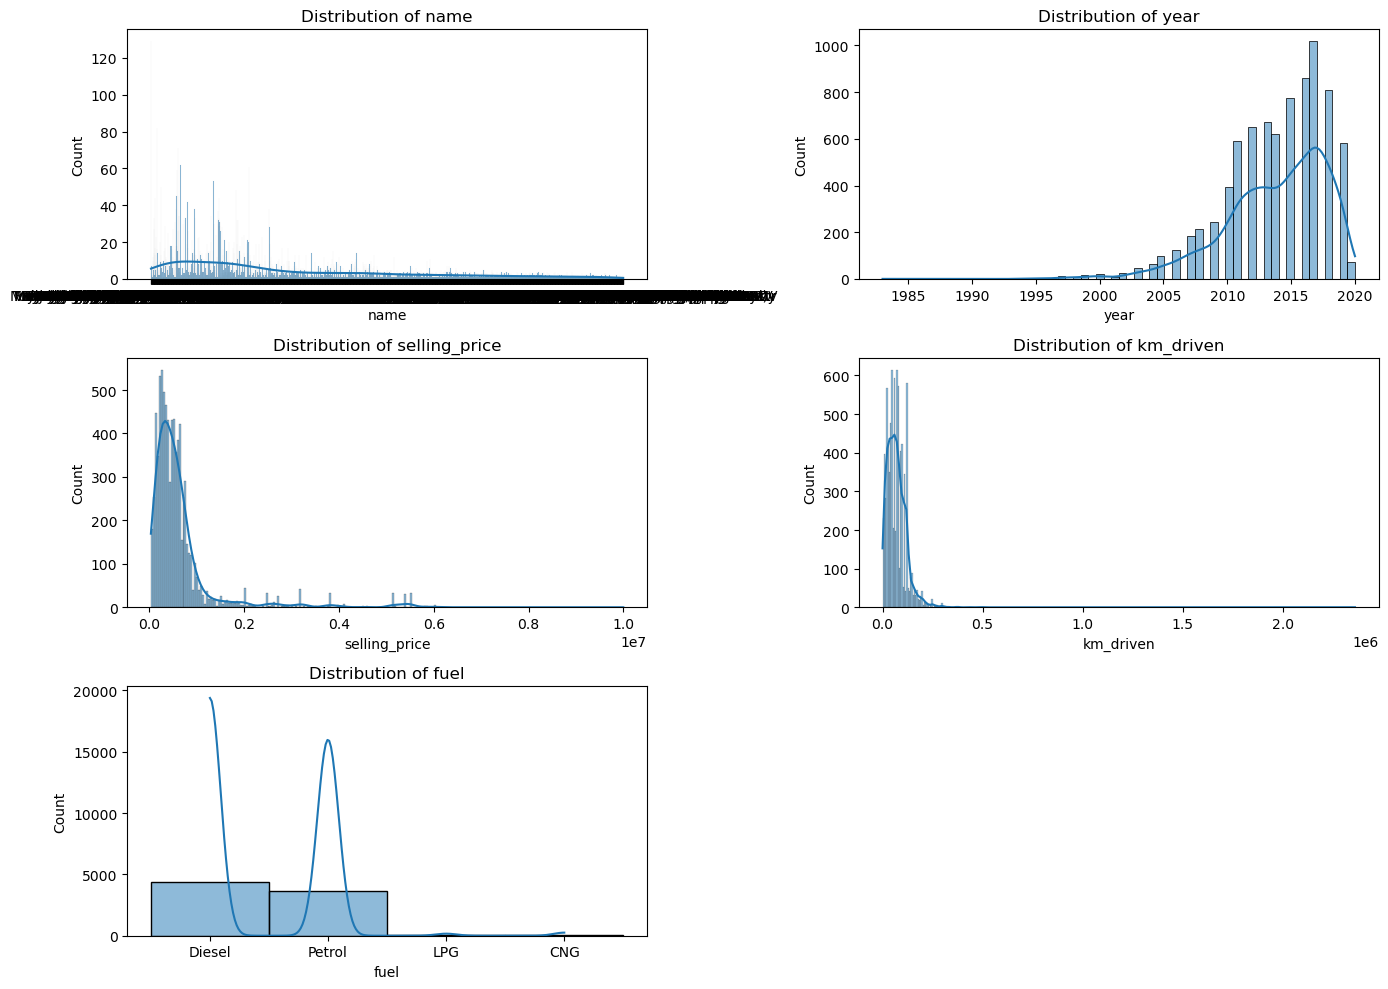

In [39]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(['name', 'year', 'selling_price', 'km_driven','fuel'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11976\3095037878.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='year', y='km_driven', marker='o', ci=None)


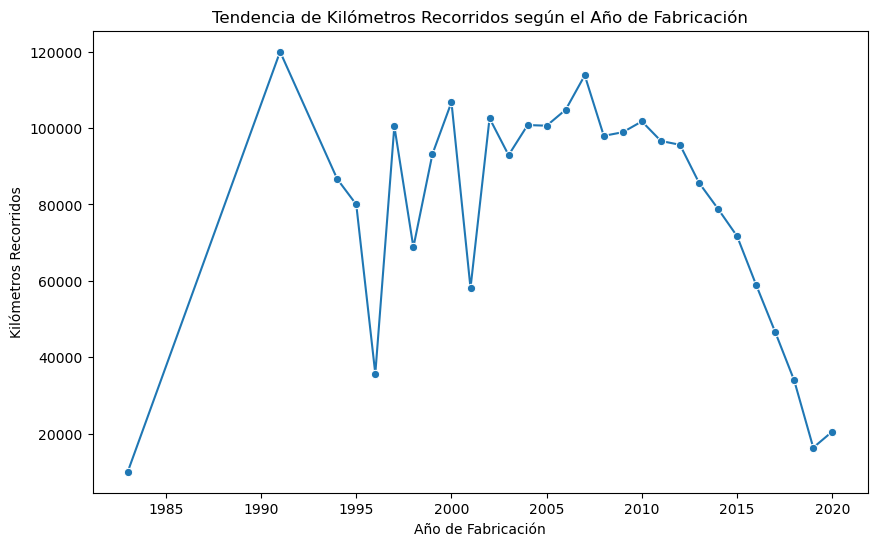

In [56]:
#Análisis del Kilometraje según el Año
# Usa un gráfico de línea para ver cómo el precio de venta cambia en relación al año de fabricación.
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='km_driven', marker='o', ci=None)
plt.title('Tendencia de Kilómetros Recorridos según el Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Kilómetros Recorridos')
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11976\2055855024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seller_type', y='selling_price', data=data, palette='pastel')


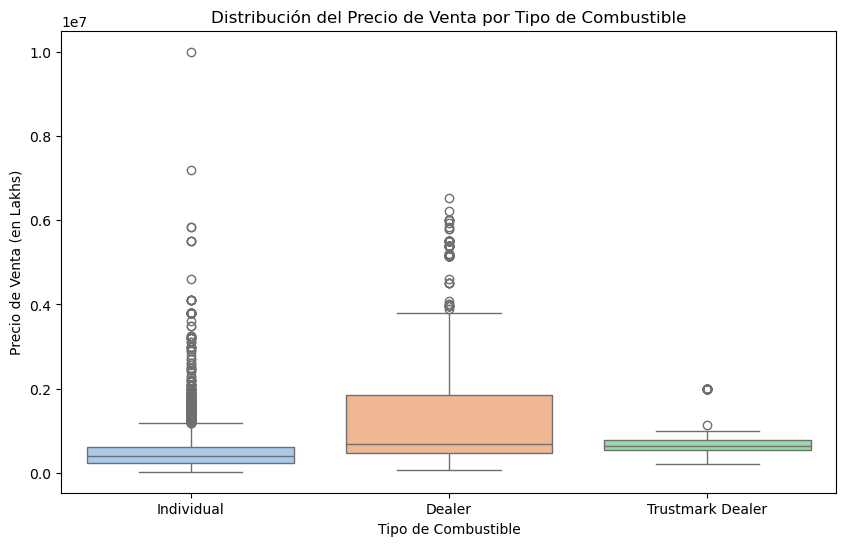

In [62]:
# Tendencia en el Precio de Venta según el Tipo de Combustible
# Utiliza un boxplot para ver cómo los precios de venta varían según el tipo de combustible.
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=data, palette='pastel')
plt.title('Distribución del Precio de Venta por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta (en Lakhs)')
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_11976\675059482.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='year', y='km_driven', marker='o', ci=None)


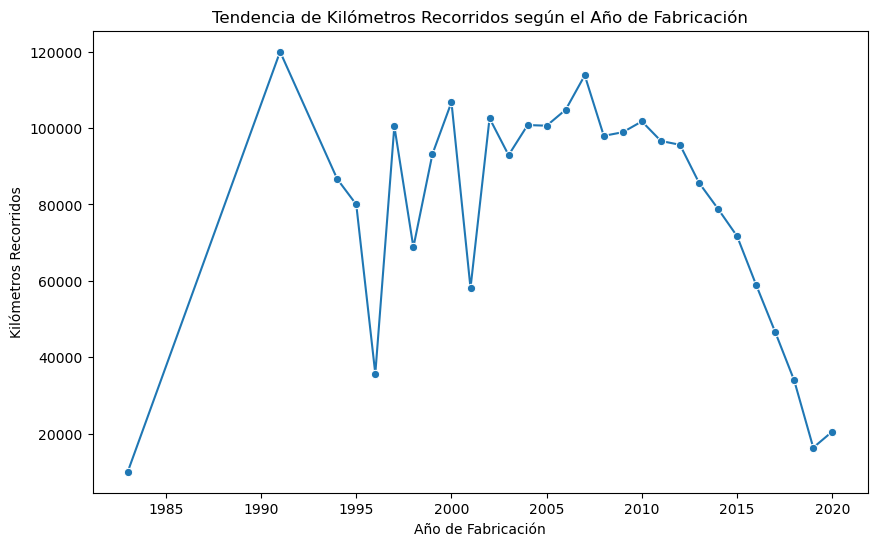

In [64]:
#  Kilometraje según el Año
##Tendencia de Kilómetros Recorridos según el Año de Fabricación: Muestra el kilometraje promedio de los vehículos 
#fabricados cada año, lo cual ayuda a observar el desgaste relacionado con la antigüedad del vehículo.
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='km_driven', marker='o', ci=None)
plt.title('Tendencia de Kilómetros Recorridos según el Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Kilómetros Recorridos')
plt.show()

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import LabelEncoder

In [74]:
data = data.copy()  # Crear copia para evitar modificar datos originales
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [77]:
X = data.drop('selling_price', axis=1)  # Aquí asumimos 'Selling_Price' como la variable objetivo
y = data['selling_price']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
correlation_matrix = data.corr()
print("Correlación con 'selling_price':\n", correlation_matrix['selling_price'].sort_values(ascending=False))

Correlación con 'selling_price':
 selling_price    1.000000
year             0.414092
torque           0.106644
engine           0.054660
seats            0.041358
name            -0.072100
mileage         -0.143479
fuel            -0.194029
km_driven       -0.225534
owner           -0.229174
max_power       -0.231122
seller_type     -0.335857
transmission    -0.588845
Name: selling_price, dtype: float64


In [91]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (5689, 12)
Tamaño del conjunto de prueba: (2439, 12)


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [120]:
import numpy as np
import pandas as pd
from sklearn.datasets import Car_details v3
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (4282462665.py, line 3)